In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Clean_Amazon_Earbuds.csv')
data.drop(data.columns[0],axis=1,inplace=True)

In [3]:
data

,Titles,Brands,Prices,Stars,Ratings,Review_Words
0,JLab Audio JBuds Air Sport True Wireless Bluet...,JLAB,69.00,4.1,1815.0,"['sound quality', 'battery life', 'stopped wor..."
1,Panasonic RPHV21R In-Ear Earbud Heaphones with...,Panasonic,17.60,3.8,37.0,"['earbuds', 'big for my ears', 'another pair',..."
2,Jabra BT2050 Bluetooth Headset (Black),Jabra,NaN,4.2,27.0,"['ear', 'bluetooth', 'headset', 'verizon', 'ea..."
3,Panasonic Canal Type Earphone High Resolution ...,Panasonic,NaN,4.7,25.0,['No Review']
4,Sony ECM-TL3 Earphone-Style Mini Electret Cond...,Sony,17.99,4.2,215.0,"['sound quality', 'crystal clear', 'sides of t..."
...,...,...,...,...,...,...
1425,Sony MDR-EX450-W Earphones with Aluminium Hous...,Sony,86.27,4.2,97.0,['No Review']
1426,Koss KEB4 Portable Earbud (Black) (Discontinue...,Koss,NaN,3.9,17.0,['No Review']
1427,Samsung Galaxy Buds (2019) SM-R170 Bluetooth E...,SAMSUNG,91.41,4.5,2594.0,"['battery life', 'sound quality', 'stopped wor..."
1428,1-Pack Panasonic RP-HV096 Black Stereo Earphones,Panasonic,95.05,NaN,0.0,['No Review']


In [4]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [5]:
Prices = data.groupby('Brands').Prices.mean()
Prices

Brands
Amazon Renewed                57.530469
Audio-Technica                96.586429
Bang & Olufsen               221.658571
Beats                        166.595625
JBL                           55.026212
JLAB                          29.761905
JVC                           44.537251
Jabra                         90.548077
Koss                          24.011270
Monster                       37.370714
PHILIPS                       22.173273
Panasonic                     38.635846
Pioneer                       38.786818
Plantronics                   72.664286
SAMSUNG                       56.378750
Sennheiser Consumer Audio    142.073704
Shure                        202.108333
Skullcandy                    37.572200
Sony                          75.360597
Name: Prices, dtype: float64

In [6]:
Stars = data.groupby('Brands').Stars.mean()
Stars

Brands
Amazon Renewed               3.916418
Audio-Technica               3.778205
Bang & Olufsen               3.761111
Beats                        4.506250
JBL                          3.819149
JLAB                         3.848485
JVC                          3.836471
Jabra                        3.500000
Koss                         3.528302
Monster                      3.782353
PHILIPS                      3.704615
Panasonic                    3.801020
Pioneer                      3.822222
Plantronics                  3.692857
SAMSUNG                      4.130769
Sennheiser Consumer Audio    3.927586
Shure                        3.860000
Skullcandy                   4.007778
Sony                         3.840000
Name: Stars, dtype: float64

In [7]:
Items = data.groupby('Brands').Titles.count()
Items

Brands
Amazon Renewed                78
Audio-Technica                86
Bang & Olufsen                25
Beats                         17
JBL                           97
JLAB                          33
JVC                          222
Jabra                         38
Koss                          91
Monster                       53
PHILIPS                       68
Panasonic                    117
Pioneer                       30
Plantronics                   29
SAMSUNG                       64
Sennheiser Consumer Audio     31
Shure                         45
Skullcandy                    94
Sony                         212
Name: Titles, dtype: int64

In [8]:
Ratings = data.groupby('Brands').Ratings.sum()
Ratings

Brands
Amazon Renewed                13148.0
Audio-Technica                 8767.0
Bang & Olufsen                 9456.0
Beats                          8403.0
JBL                           25518.0
JLAB                          23279.0
JVC                           46951.0
Jabra                         23988.0
Koss                           5363.0
Monster                        6631.0
PHILIPS                       29381.0
Panasonic                    108273.0
Pioneer                        1243.0
Plantronics                    7363.0
SAMSUNG                       39018.0
Sennheiser Consumer Audio     24611.0
Shure                         10374.0
Skullcandy                   111355.0
Sony                          87447.0
Name: Ratings, dtype: float64

In [9]:
score = pd.concat([Ratings,Prices,Stars,Items],axis=1)
print(score.shape)
score.sort_values('Ratings',ascending=False)

(19, 4)


,Ratings,Prices,Stars,Titles
Brands,,,,
Skullcandy,111355.0,37.572200,4.007778,94
Panasonic,108273.0,38.635846,3.801020,117
Sony,87447.0,75.360597,3.840000,212
JVC,46951.0,44.537251,3.836471,222
SAMSUNG,39018.0,56.378750,4.130769,64
PHILIPS,29381.0,22.173273,3.704615,68
JBL,25518.0,55.026212,3.819149,97
Sennheiser Consumer Audio,24611.0,142.073704,3.927586,31
Jabra,23988.0,90.548077,3.500000,38


In [10]:
print(SS.fit_transform(score).shape)
SS_score_df = SS.fit_transform(score)
SS_score_df

(19, 4)


array([[-0.53915516, -0.37243791,  0.3378338 ,  0.04870259],
       [-0.67085821,  0.29143799, -0.3201311 ,  0.19106401],
       [-0.65014527,  2.41742288, -0.40150753, -0.8944418 ],
       [-0.6818009 ,  1.48145913,  3.14574202, -1.03680322],
       [-0.16728419, -0.41500544, -0.12521723,  0.38681096],
       [-0.23459374, -0.84444987,  0.01443701, -0.75208039],
       [ 0.47704165, -0.59329751, -0.04275714,  2.61120811],
       [-0.21327955,  0.18879767, -1.64453254, -0.6631045 ],
       [-0.77319037, -0.94219956, -1.5098008 ,  0.28003989],
       [-0.73507134, -0.7151148 , -0.30038535, -0.39617684],
       [-0.05115342, -0.97344196, -0.67045664, -0.12924918],
       [ 2.32052361, -0.69361   , -0.21151847,  0.7427145 ],
       [-0.89704715, -0.69104377, -0.11058678, -0.80546592],
       [-0.71306572, -0.11519225, -0.726432  , -0.82326109],
       [ 0.23855722, -0.3920149 ,  1.35825782, -0.20042989],
       [-0.19455072,  1.06463382,  0.39100071, -0.78767074],
       [-0.62254805,  2.

In [11]:
SS_score_df = pd.DataFrame(SS_score_df,index=score.index,columns=score.columns).sort_values('Ratings',ascending=False)
SS_score_df['Sum'] = SS_score_df['Ratings'] +SS_score_df['Prices']+SS_score_df['Stars']+SS_score_df['Titles']
SS_score_df

,Ratings,Prices,Stars,Titles,Sum
Brands,,,,,
Skullcandy,2.413176,-0.711690,0.772754,0.333425,2.807666
Panasonic,2.320524,-0.693610,-0.211518,0.742715,2.158110
Sony,1.694446,-0.069360,-0.025955,2.433256,4.032386
JVC,0.477042,-0.593298,-0.042757,2.611208,2.452195
SAMSUNG,0.238557,-0.392015,1.358258,-0.200430,1.004370
PHILIPS,-0.051153,-0.973442,-0.670457,-0.129249,-1.824301
JBL,-0.167284,-0.415005,-0.125217,0.386811,-0.320696
Sennheiser Consumer Audio,-0.194551,1.064634,0.391001,-0.787671,0.473413
Jabra,-0.213280,0.188798,-1.644533,-0.663104,-2.332119


In [12]:
SS_score_df['Weighted Score'] = SS_score_df['Ratings']*0.45-SS_score_df['Prices']*0.3+SS_score_df['Stars']*0.2+SS_score_df['Titles']*0.05
SS_score_df



,Ratings,Prices,Stars,Titles,Sum,Weighted Score
Brands,,,,,,
Skullcandy,2.413176,-0.711690,0.772754,0.333425,2.807666,1.470658
Panasonic,2.320524,-0.693610,-0.211518,0.742715,2.158110,1.247151
Sony,1.694446,-0.069360,-0.025955,2.433256,4.032386,0.899780
JVC,0.477042,-0.593298,-0.042757,2.611208,2.452195,0.514667
SAMSUNG,0.238557,-0.392015,1.358258,-0.200430,1.004370,0.486585
PHILIPS,-0.051153,-0.973442,-0.670457,-0.129249,-1.824301,0.128460
JBL,-0.167284,-0.415005,-0.125217,0.386811,-0.320696,0.043521
Sennheiser Consumer Audio,-0.194551,1.064634,0.391001,-0.787671,0.473413,-0.368121
Jabra,-0.213280,0.188798,-1.644533,-0.663104,-2.332119,-0.514677


In [13]:
SS_score_df.sort_values('Weighted Score')

,Ratings,Prices,Stars,Titles,Sum,Weighted Score
Brands,,,,,,
Bang & Olufsen,-0.650145,2.417423,-0.401508,-0.894442,0.471328,-1.142816
Shure,-0.622548,2.085107,0.069255,-0.538538,0.993275,-0.918754
Jabra,-0.213280,0.188798,-1.644533,-0.663104,-2.332119,-0.514677
Plantronics,-0.713066,-0.115192,-0.726432,-0.823261,-2.377951,-0.472771
Audio-Technica,-0.670858,0.291438,-0.320131,0.191064,-0.508487,-0.443791
Sennheiser Consumer Audio,-0.194551,1.064634,0.391001,-0.787671,0.473413,-0.368121
Koss,-0.773190,-0.942200,-1.509801,0.280040,-2.945151,-0.353234
Pioneer,-0.897047,-0.691044,-0.110587,-0.805466,-2.504144,-0.258749
Monster,-0.735071,-0.715115,-0.300385,-0.396177,-2.146748,-0.196134


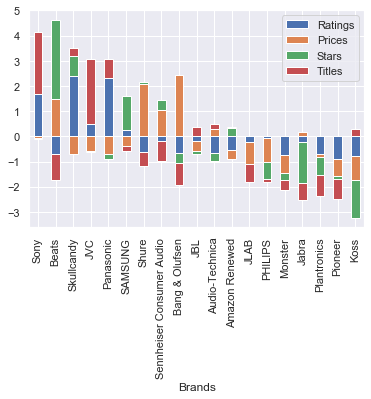

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
SS_score_df.sort_values('Sum',ascending=False).iloc[:,:4].plot.bar(stacked=True)
## 沒有加權時可以讓我們看出各個廠商的優勢是什麼

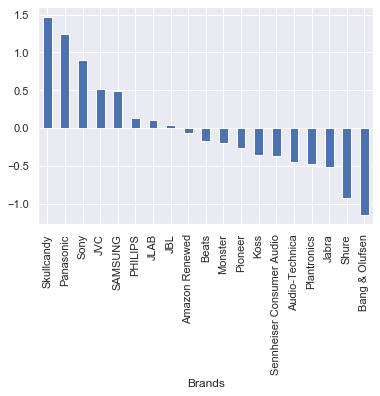

In [29]:
SS_score_df.sort_values('Weighted Score',ascending=False).iloc[:,-1].plot.bar(stacked=True)

In [30]:
SS_score_df.to_csv('SS_Amazon.Earbuds.csv')